# AC Mouse Contingency Brief Report

This report is supplement to the abstract submitted to the 2022 Annual Meeting of the *Vision Sciences Society*.

Data available at: https://github.com/liyuan31/ACMC/tree/main/data

Code available at: https://github.com/liyuan31/acvs-online


## Roles of goal-directed performance optimization vs. stimulus-driven salience in determining attentional control strategy

**Walden Y. Li and Andrew B. Leber**

*The Ohio State University*

### Abstract

Attentional control strategy accounts for significant variation in individual visual search performance. Research has shown that an individual’s strategy optimality is stable within visual search and foraging tasks (Clarke et al., 2020) and generalizes across similar visual search tasks (Li et al., 2021). However, in some paradigms designed to investigate strategy, stimulus salience—rather than individuals’ drive to optimize performance—might explain behavior.  Here, we pitted stimulus salience vs. strategy optimization via a modification of the Adaptive Choice Visual Search (ACVS; Irons & Leber, 2018) paradigm.  In Experiment 1, Control Group participants could choose to search for either a red or blue target containing a “5”—each of which was present on every trial. Participants moved the mouse to search, revealing digits by hovering over each object, one at a time. One color subset was always less numerous than the other; as a result, it was more optimal to search for the target in the smaller subset (although note that the smaller subset items were also more salient).  In the Manipulated Group, we presented targets sooner in the large subset than in the small subset, such that searching the large (and less salient) subset was now the optimal strategy.  Experiment 2 contained a similar task with subsets defined by their spatial location instead of colors.  In both experiments, participants’ tendency of choosing the small subset was significantly reduced in the Manipulated Group, in which the target appeared sooner in larger subsets. These results demonstrate that strategy optimization overrides stimulus salience in visual search, and strategy is dependent more on internal, rather than external, factors.

### Introduction

Attentional control strategy has been a topic of major research focus in our lab over the past few years. It is found that individuals 

### General Methods

We recruited participants through OSU's REP. Experiments were coded by JavaScript and PHP. Participants completed the experiments at their own places using their own devices.

Expt 1 included two groups (ACMC 2 and ACMC 3) that were both participants from pilot studies. Expt 2 included two groups that were randomly assigned (ACMC 6).

<img src="https://exp.leberatory.org/files/instr/acmc1/Slide8.jpeg" style="width:600px;display:block;margin:auto">

<p style='text-align:center'>The original ACMC design.</p>

### Expt 1

The display includes red, blue, and green squares with digits between 1 and 9. Two targets, one red and one blue, have the digit 5 on them, while other red and blue squares have digits randomly drawn from a uniform distribution from 1 to 9, excluding 5. Green squares are irrelevant distractors that can have digit 5.

Before the start of each trial, square digits are hidden from the display. Participants need to click on the central fixation cross to trigger the start of the trial. Then, they can hover on any square to reveal to digit on that square. Note that if the hover is less than 200 ms, the digit will not show, which is to prevent sweeping through the display without actually searching.

In the **control version**, there is no manipulation on when target will show in each color subset. This makes the small subset the optimal one, since searching in it will on average make one find the target faster.

In the **manipulated version**, the target in the large subset will appear sooner than the small subset. This makes the large subset optimal.

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen


def read_data_1(dir):
    # retrieve subject list
    sub_list = json.loads(urlopen(dir + 'sub_list.json').read())
    out = []
    # read data for each subject and obtain stats
    for s in sub_list:
        data = pd.read_csv(dir + s)
        sub = data['id'][0]
        # trim rt by 3 std from raw mean rt
        trimmed = data[data['rt'] > data['rt'].mean() - 3*data['rt'].std()]
        trimmed = trimmed[trimmed['rt'] < data['rt'].mean() + 3*data['rt'].std()]
        rt = trimmed['rt'].mean()
        opt = trimmed['is_opt'].mean()
        feature = (trimmed['color']=='red').mean()
        out.append([sub, rt, opt, feature])
    return pd.DataFrame(out, columns=['id','rt','opt','feature'])


df1a = read_data_1('https://raw.githubusercontent.com/liyuan31/ACMC/main/data/expt_1/manip/')
df1b = read_data_1('https://raw.githubusercontent.com/liyuan31/ACMC/main/data/expt_1/ctrl/')
print(df1a.shape, df1b.shape)

(26, 4) (22, 4)


The two groups were collected separately because they were originally meant to be pilot data. As the result, no particular sample size and stopping rule was pre-determined. Due to the time constrait, we still try to compare results from the two groups, but caution is needed when interpreting the result.

Under H0 (small subset is always preferred because of salience), there should be no differece in proportion chosen in the small subset. If, alternatively, a drive for strategy optimization oveerides stimulus salience, we should see more preferrence for larger subsets in the manipulated version.


Results suggest a significant effect of target manipulation.

Below is the bar graph plotted. Error bars incdicate standard error of means.

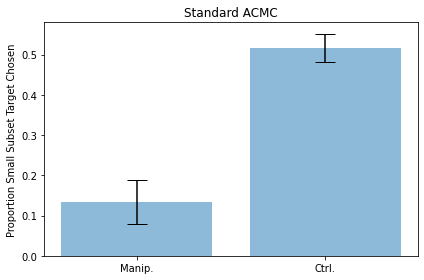

In [2]:
stand_manip = 1 - df1a['opt']
stand_ctrl = df1b['opt']
labels = ['Manip.', 'Ctrl.']
x_pos = np.arange(len(labels))
opts = [stand_manip.mean(), stand_ctrl.mean()]
error = [stand_manip.std()/np.sqrt(len(stand_manip)), stand_ctrl.std()/np.sqrt(len(stand_ctrl))]
fig, ax = plt.subplots()
ax.bar(x_pos, opts, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Proportion Small Subset Target Chosen')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Standard ACMC')
ax.yaxis.grid(False)
plt.tight_layout()
plt.show()

We did see that if we manipulated the "optimality" of the subsets such that targets were sooner found in the large subset, there was a significant decrease in participants' preferrence for the small subset, which was the optimal subset in the stardard version. However, there are several issues with the present manipulation:

1) The optimality was only at chance level for the control task. This would be a problem if we want to claim that participants had an overall tendency to choose the small subset.
2) The two groups were not randomly assigned because they were run one after the other in our pilot study sequence.

### Expt 2
In this version of the spatial ACMC, targets appeared on both sides on the display. On the optimal side, there were 20 total squares and on the non-optimal side, there were 13 squares. That is to say, in this version the numerosity ratio was $$ 20 / 13 = 1.54 $$

<img src="https://exp.leberatory.org/files/instr/acmc5/Slide8.jpeg" style="width:600px;display:block;margin:auto">


In [3]:
def read_data_2(dir):
    # retrieve subject list
    sub_list = json.loads(urlopen(dir + 'sub_list.json').read())
    out = []
    # read data for each subject and obtain stats
    for s in sub_list:
        data = pd.read_csv(dir + s)
        sub = data['id'][0]
        version = data['version'][0]
        # trim rt by 3 std from raw mean rt
        trimmed = data[data['rt'] > data['rt'].mean() - 3*data['rt'].std()]
        trimmed = trimmed[trimmed['rt'] < data['rt'].mean() + 3*data['rt'].std()]
        rt = trimmed['rt'].mean()
        opt = trimmed['is_opt'].mean()
        feature = (trimmed['side']=='left').mean()
        out.append([sub, version, rt, opt, feature])
    return pd.DataFrame(out, columns=['id','version','rt','opt','feature'])

df2 = read_data_2('https://raw.githubusercontent.com/liyuan31/ACMC/main/data/expt_2/')
df2a = df2[df2['version']==0]
df2b = df2[df2['version']==1]
del df2
print(df2a.shape, df2b.shape)

(24, 5) (22, 5)


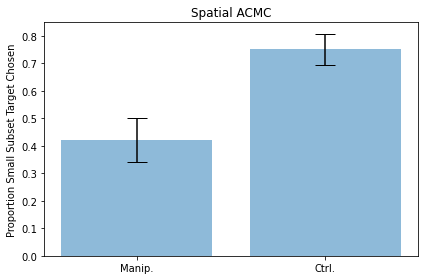

In [4]:
sp_manip = 1 - df2a['opt']
sp_ctrl = df2b['opt']
labels = ['Manip.', 'Ctrl.']
x_pos = np.arange(len(labels))
opts = [sp_manip.mean(), sp_ctrl.mean()]
error = [sp_manip.std()/np.sqrt(len(sp_manip)), sp_ctrl.std()/np.sqrt(len(sp_ctrl))]
fig, ax = plt.subplots()
ax.bar(x_pos, opts, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Proportion Small Subset Target Chosen')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Spatial ACMC')
ax.yaxis.grid(False)
plt.tight_layout()
plt.show()

The result shows that as we decrease the optimality of the small subset, participants chose targets from the small subset less often. In this version, the groups were randomly assigned and the baseline optimality was similar to what we would normally observe in the ACVS variations used in our lab.